# Cairo 示例代码片段及输出
基于 lazka、stuaxo、fomightez 和 kolibril13 的示例

In [1]:
import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
    ctx = cairo.Context(surface)
    draw_func(ctx, 200, 200)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=200))

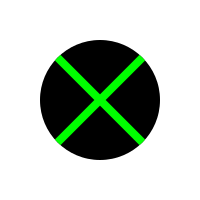

In [2]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.arc(0.5, 0.5, 0.3, 0, 2 * pi)
    cr.clip()

    cr.rectangle(0, 0, 1, 1)
    cr.fill()
    cr.set_source_rgb(0, 1, 0)
    cr.move_to(0, 0)
    cr.line_to(1, 1)
    cr.move_to(1, 0)
    cr.line_to(0, 1)
    cr.stroke()

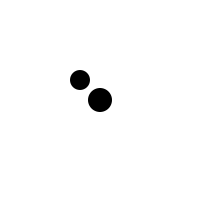

In [3]:
@disp
def draw(cr, width, height):
    cr.scale(width, height) # eg1
    cr.stroke()
    cr.set_line_cap(cairo.LINE_CAP_ROUND)
    cr.set_line_width(0.12)
    cr.move_to(0.5, 0.5)
    cr.line_to(0.5, 0.5)
    
    cr.stroke() #eg1
    xc=.4
    yc=.4
    cr.arc(xc, yc, 0.05, 0, 2 * pi)
    cr.fill()

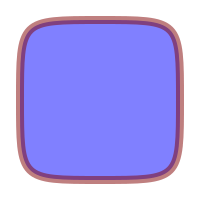

In [4]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    # a custom shape, that could be wrapped in a function
    x0 = 0.1  # parameters like cairo_rectangle
    y0 = 0.1
    rect_width = 0.8
    rect_height = 0.8
    radius = 0.4  # and an approximate curvature radius

    x1 = x0 + rect_width
    y1 = y0 + rect_height

    if rect_width / 2 < radius:
        if rect_height / 2 < radius:
            cr.move_to(x0, (y0 + y1) / 2)
            cr.curve_to(x0, y0, x0, y0, (x0 + x1) / 2, y0)
            cr.curve_to(x1, y0, x1, y0, x1, (y0 + y1) / 2)
            cr.curve_to(x1, y1, x1, y1, (x1 + x0) / 2, y1)
            cr.curve_to(x0, y1, x0, y1, x0, (y0 + y1) / 2)
        else:
            cr.move_to(x0, y0 + radius)
            cr.curve_to(x0, y0, x0, y0, (x0 + x1) / 2, y0)
            cr.curve_to(x1, y0, x1, y0, x1, y0 + radius)
            cr.line_to(x1, y1 - radius)
            cr.curve_to(x1, y1, x1, y1, (x1 + x0) / 2, y1)
            cr.curve_to(x0, y1, x0, y1, x0, y1 - radius)
    else:
        if rect_height / 2 < radius:
            cr.move_to(x0, (y0 + y1) / 2)
            cr.curve_to(x0, y0, x0, y0, x0 + radius, y0)
            cr.line_to(x1 - radius, y0)
            cr.curve_to(x1, y0, x1, y0, x1, (y0 + y1) / 2)
            cr.curve_to(x1, y1, x1, y1, x1 - radius, y1)
            cr.line_to(x0 + radius, y1)
            cr.curve_to(x0, y1, x0, y1, x0, (y0 + y1) / 2)
        else:
            cr.move_to(x0, y0 + radius)
            cr.curve_to(x0, y0, x0, y0, x0 + radius, y0)
            cr.line_to(x1 - radius, y0)
            cr.curve_to(x1, y0, x1, y0, x1, y0 + radius)
            cr.line_to(x1, y1 - radius)
            cr.curve_to(x1, y1, x1, y1, x1 - radius, y1)
            cr.line_to(x0 + radius, y1)
            cr.curve_to(x0, y1, x0, y1, x0, y1 - radius)

    cr.close_path()

    cr.set_source_rgb(0.5, 0.5, 1)
    cr.fill_preserve()
    cr.set_source_rgba(0.5, 0, 0, 0.5)
    cr.stroke()


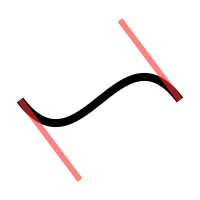

In [5]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    x, y = 0.1, 0.5
    x1, y1 = 0.4, 0.9
    x2, y2 = 0.6, 0.1
    x3, y3 = 0.9, 0.5

    cr.move_to(x, y)
    cr.curve_to(x1, y1, x2, y2, x3, y3)

    cr.stroke()

    cr.set_source_rgba(1, 0.2, 0.2, 0.6)
    cr.set_line_width(0.03)
    cr.move_to(x, y)
    cr.line_to(x1, y1)
    cr.move_to(x2, y2)
    cr.line_to(x3, y3)
    cr.stroke()

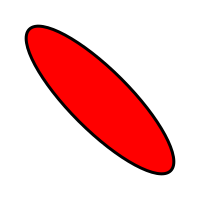

In [6]:
def path_ellipse(cr, x, y, width, height, angle=0):
    """
    x      - center x
    y      - center y
    width  - width of ellipse  (in x direction when angle=0)
    height - height of ellipse (in y direction when angle=0)
    angle  - angle in radians to rotate, clockwise
    """
    cr.save()
    cr.translate(x, y)
    cr.rotate(angle)
    cr.scale(width / 2.0, height / 2.0)
    cr.arc(0.0, 0.0, 1.0, 0.0, 2.0 * pi)
    cr.restore()

@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    path_ellipse(cr, 0.5, 0.5, 1.0, 0.3, pi / 4.0)

    # fill
    cr.set_source_rgba(1, 0, 0, 1)
    cr.fill_preserve()

    # stroke
    # reset identity matrix so line_width is a constant
    # width in device-space, not user-space
    cr.save()
    cr.identity_matrix()
    cr.set_source_rgba(0, 0, 0, 1)
    cr.set_line_width(3)
    cr.stroke()
    cr.restore()

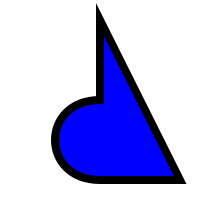

In [7]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.move_to(0.5, 0.1)
    cr.line_to(0.9, 0.9)
    cr.rel_line_to(-0.4, 0.0)
    cr.curve_to(0.2, 0.9, 0.2, 0.5, 0.5, 0.5)
    cr.close_path()

    cr.set_source_rgb(0, 0, 1)
    cr.fill_preserve()
    cr.set_source_rgb(0, 0, 0)
    cr.stroke()

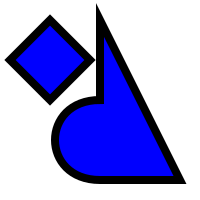

In [8]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.move_to(0.5, 0.1)
    cr.line_to(0.9, 0.9)
    cr.rel_line_to(-0.4, 0.0)
    cr.curve_to(0.2, 0.9, 0.2, 0.5, 0.5, 0.5)
    cr.close_path()

    cr.move_to(0.25, 0.1)
    cr.rel_line_to(0.2, 0.2)
    cr.rel_line_to(-0.2, 0.2)
    cr.rel_line_to(-0.2, -0.2)
    cr.close_path()

    cr.set_source_rgb(0, 0, 1)
    cr.fill_preserve()
    cr.set_source_rgb(0, 0, 0)
    cr.stroke()

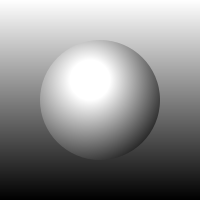

In [9]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
    pat.add_color_stop_rgba(1, 0, 0, 0, 1)
    pat.add_color_stop_rgba(0, 1, 1, 1, 1)
    cr.rectangle(0, 0, 1, 1)
    cr.set_source(pat)
    cr.fill()

    pat = cairo.RadialGradient(0.45, 0.4, 0.1,
                               0.4, 0.4, 0.5)
    pat.add_color_stop_rgba(0, 1, 1, 1, 1)
    pat.add_color_stop_rgba(1, 0, 0, 0, 1)
    cr.set_source(pat)
    cr.arc(0.5, 0.5, 0.3, 0, 2 * pi)
    cr.fill()


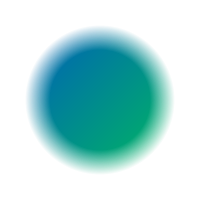

In [10]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    pattern = cairo.LinearGradient(0, 0, 1, 1)
    pattern.add_color_stop_rgb(0, 0, 0.3, 0.8)
    pattern.add_color_stop_rgb(1, 0, 0.8, 0.3)

    mask = cairo.RadialGradient(0.5, 0.5, 0.25, 0.5, 0.5, 0.5)
    mask.add_color_stop_rgba(0, 0, 0, 0, 1)
    mask.add_color_stop_rgba(0.5, 0, 0, 0, 0)

    cr.set_source(pattern)
    cr.mask(mask)

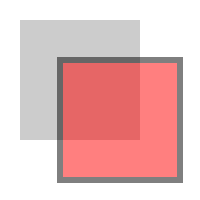

In [11]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.rectangle(0.1, 0.1, 0.6, 0.6)
    cr.set_line_width(0.03)
    cr.set_source_rgb(0.8, 0.8, 0.8)
    cr.fill()

    cr.push_group()
    cr.rectangle(0.3, 0.3, 0.6, 0.6)
    cr.set_source(cairo.SolidPattern(1, 0, 0))
    cr.fill_preserve()
    cr.set_source(cairo.SolidPattern(0, 0, 0))
    cr.stroke()
    cr.pop_group_to_source()
    cr.paint_with_alpha(0.5)

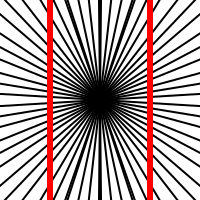

In [12]:
@disp
def draw(ctx, width, height):
    LINES = 32
    MAX_THETA = .80 * pi * 2
    THETA_INC = 2.0 * MAX_THETA / (LINES - 1)

    ctx.set_source_rgb(0, 0, 0)
    ctx.set_line_width(2.0)

    ctx.save()

    ctx.translate(width / 2, height / 2)
    ctx.rotate(MAX_THETA)

    for i in range(LINES):
        ctx.move_to(-2 * width, 0)
        ctx.line_to(2 * width, 0)
        ctx.stroke()

        ctx.rotate(- THETA_INC)

    ctx.restore()

    ctx.set_line_width(6)
    ctx.set_source_rgb(1, 0, 0)

    ctx.move_to(width / 4.0, 0)
    ctx.rel_line_to(0, height)
    ctx.stroke()

    ctx.move_to(3 * width / 4.0, 0)
    ctx.rel_line_to(0, height)
    ctx.stroke()

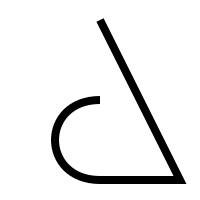

In [13]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.move_to(0.5, 0.1)
    cr.line_to(0.9, 0.9)
    cr.rel_line_to(-0.4, 0.0)
    cr.curve_to(0.2, 0.9, 0.2, 0.5, 0.5, 0.5)

    cr.stroke()

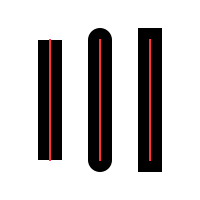

In [14]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.set_line_width(0.12)
    cr.set_line_cap(cairo.LINE_CAP_BUTT)  # default
    cr.move_to(0.25, 0.2)
    cr.line_to(0.25, 0.8)
    cr.stroke()
    cr.set_line_cap(cairo.LINE_CAP_ROUND)
    cr.move_to(0.5, 0.2)
    cr.line_to(0.5, 0.8)
    cr.stroke()
    cr.set_line_cap(cairo.LINE_CAP_SQUARE)
    cr.move_to(0.75, 0.2)
    cr.line_to(0.75, 0.8)
    cr.stroke()

    # draw helping lines
    cr.set_source_rgb(1, 0.2, 0.2)
    cr.set_line_width(0.01)
    cr.move_to(0.25, 0.2)
    cr.line_to(0.25, 0.8)
    cr.move_to(0.5, 0.2)
    cr.line_to(0.5, 0.8)
    cr.move_to(0.75, 0.2)
    cr.line_to(0.75, 0.8)
    cr.stroke()

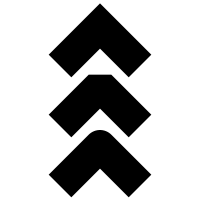

In [15]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.set_line_width(0.16)
    cr.move_to(0.3, 0.33)
    cr.rel_line_to(0.2, -0.2)
    cr.rel_line_to(0.2, 0.2)
    cr.set_line_join(cairo.LINE_JOIN_MITER)  # default
    cr.stroke()

    cr.move_to(0.3, 0.63)
    cr.rel_line_to(0.2, -0.2)
    cr.rel_line_to(0.2, 0.2)
    cr.set_line_join(cairo.LINE_JOIN_BEVEL)
    cr.stroke()

    cr.move_to(0.3, 0.93)
    cr.rel_line_to(0.2, -0.2)
    cr.rel_line_to(0.2, 0.2)
    cr.set_line_join(cairo.LINE_JOIN_ROUND)
    cr.stroke()

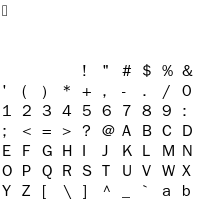

In [16]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.select_font_face("Sans", cairo.FONT_SLANT_NORMAL,
                        cairo.FONT_WEIGHT_NORMAL)
    # draw 0.08 glyphs in 0.10 squares, at(0.01, 0.02) from left corner
    cr.set_font_size(0.08)

    glyphs = []
    index = 0
    for y in range(10):
        for x in range(10):
            glyphs.append((index, x / 10.0 + 0.01, y / 10.0 + 0.08))
            index += 1

    cr.show_glyphs(glyphs)

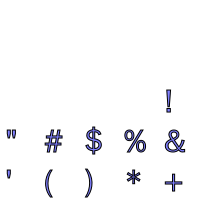

In [17]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.select_font_face("Sans", cairo.FONT_SLANT_NORMAL,
                        cairo.FONT_WEIGHT_NORMAL)
    # draw 0.16 glyphs in 0.20 squares, at (0.02, 0.04) from left corner
    cr.set_font_size(0.16)

    glyphs = []
    index = 20
    for y in range(5):
        for x in range(5):
            glyphs.append((index, x / 5.0 + 0.02, y / 5.0 + 0.16))
            index += 1

    cr.glyph_path(glyphs)
    cr.set_source_rgb(0.5, 0.5, 1.0)
    cr.fill_preserve()
    cr.set_source_rgb(0, 0, 0)
    cr.set_line_width(0.005)
    cr.stroke()

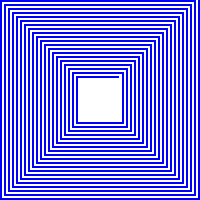

In [18]:
@disp
def draw(ctx, width, height):
    wd = .02 * width
    hd = .02 * height

    width -= 2
    height -= 2

    ctx.move_to(width + 1, 1 - hd)
    for i in range(20):
        ctx.rel_line_to(0, height - hd * (2 * i - 1))
        ctx.rel_line_to(-(width - wd * (2 * i)), 0)
        ctx.rel_line_to(0, -(height - hd * (2 * i)))
        ctx.rel_line_to(width - wd * (2 * i + 1), 0)

    ctx.set_source_rgb(0, 0, 1)
    ctx.stroke()

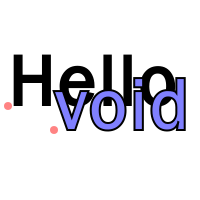

In [19]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.select_font_face("Sans", cairo.FONT_SLANT_NORMAL,
                        cairo.FONT_WEIGHT_BOLD)
    cr.set_font_size(0.35)

    cr.move_to(0.04, 0.53)
    cr.show_text("Hello")

    cr.move_to(0.27, 0.65)
    cr.text_path("void")
    cr.set_source_rgb(0.5, 0.5, 1)
    cr.fill_preserve()
    cr.set_source_rgb(0, 0, 0)
    cr.set_line_width(0.01)
    cr.stroke()

    # draw helping lines
    cr.set_source_rgba(1, 0.2, 0.2, 0.6)
    cr.arc(0.04, 0.53, 0.02, 0, 2 * pi)
    cr.arc(0.27, 0.65, 0.02, 0, 2 * pi)
    cr.fill()

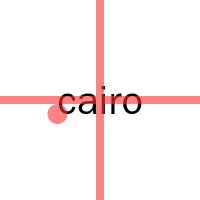

In [20]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    utf8 = "cairo"

    cr.select_font_face("Sans",
                        cairo.FONT_SLANT_NORMAL,
                        cairo.FONT_WEIGHT_NORMAL)

    cr.set_font_size(0.2)
    x_bearing, y_bearing, width, height, x_advance, y_advance = \
        cr.text_extents(utf8)
    x = 0.5 - (width / 2 + x_bearing)
    y = 0.5 - (height / 2 + y_bearing)

    cr.move_to(x, y)
    cr.show_text(utf8)

    # draw helping lines
    cr.set_source_rgba(1, 0.2, 0.2, 0.6)
    cr.arc(x, y, 0.05, 0, 2 * pi)
    cr.fill()
    cr.move_to(0.5, 0)
    cr.rel_line_to(0, 1)
    cr.move_to(0, 0.5)
    cr.rel_line_to(1, 0)
    cr.stroke()

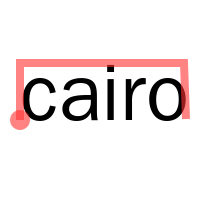

In [21]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    utf8 = "cairo"

    cr.select_font_face("Sans",
                        cairo.FONT_SLANT_NORMAL,
                        cairo.FONT_WEIGHT_NORMAL)

    cr.set_font_size(0.4)
    x_bearing, y_bearing, width, height, x_advance, y_advance = \
        cr.text_extents(utf8)

    x = 0.1
    y = 0.6

    cr.move_to(x, y)
    cr.show_text(utf8)

    # draw helping lines
    cr.set_source_rgba(1, 0.2, 0.2, 0.6)
    cr.arc(x, y, 0.05, 0, 2 * pi)
    cr.fill()
    cr.move_to(x, y)
    cr.rel_line_to(0, -height)
    cr.rel_line_to(width, 0)
    cr.rel_line_to(x_bearing, -y_bearing)
    cr.stroke()

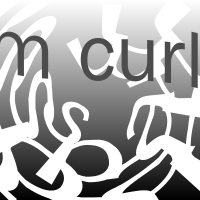

In [22]:
import math
all_width = all_height = text_width = 0

def warpPath(ctx, function):
    first = True

    for type, points in ctx.copy_path():
        if type == cairo.PATH_MOVE_TO:
            if first:
                ctx.new_path()
                first = False
            x, y = function(*points)
            ctx.move_to(x, y)

        elif type == cairo.PATH_LINE_TO:
            x, y = function(*points)
            ctx.line_to(x, y)

        elif type == cairo.PATH_CURVE_TO:
            x1, y1, x2, y2, x3, y3 = points
            x1, y1 = function(x1, y1)
            x2, y2 = function(x2, y2)
            x3, y3 = function(x3, y3)
            ctx.curve_to(x1, y1, x2, y2, x3, y3)

        elif type == cairo.PATH_CLOSE_PATH:
            ctx.close_path()


def spiral(x, y):
    theta0 = -math.pi * 3 / 4
    theta = x / all_width * math.pi * 2 + theta0
    radius = y + 200 - x / 7
    xnew = radius * math.cos(theta)
    ynew = radius * math.sin(-theta)
    return xnew + all_width / 2, ynew + all_height / 2


def curl(x, y):
    xn = x - text_width / 2
    xnew = xn
    ynew = y + xn ** 3 / ((text_width / 2) ** 3) * 70
    return xnew + all_width / 2, ynew + all_height * 2 / 5


@disp
def draw(ctx, width, height):
    global text_width, all_width, all_height

    all_width, all_height = width, height

    solidpattern = ctx.get_source()

    # background
    pat = cairo.LinearGradient(0.0, 0.0, 0, height)
    pat.add_color_stop_rgba(1, 0, 0, 0, 1)
    pat.add_color_stop_rgba(0, 1, 1, 1, 1)

    ctx.rectangle(0, 0, width, height)
    ctx.set_source(pat)
    ctx.fill()

    # foreground
    ctx.set_source(solidpattern)
    ctx.set_source_rgb(1, 1, 1)

    ctx.select_font_face("Sans")
    ctx.set_font_size(80)

    # spiral text
    ctx.new_path()
    ctx.move_to(0, 0)
    ctx.text_path("pycairo - " + "spam " * 5)
    warpPath(ctx, spiral)
    ctx.fill()

    # curly text
    ctx.new_path()
    ctx.move_to(0, 0)
    ctx.set_source_rgb(0.3, 0.3, 0.3)
    text = "I am curly :)"
    ctx.text_path(text)
    text_width = ctx.text_extents(text)[2]
    warpPath(ctx, curl)
    ctx.fill()

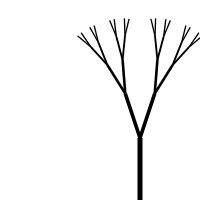

In [23]:
from contextlib import contextmanager

@disp
def draw(ctx, width, height):
    cr = ctx
    @contextmanager
    def saved(cr):
        cr.save()
        try:
            yield cr
        finally:
            cr.restore()

    def Tree(angle):
        cr.move_to(0, 0)
        cr.translate(0, -65)
        cr.line_to(0, 0)
        cr.stroke()
        cr.scale(0.72, 0.72)
        if angle > 0.12:
            for a in [-angle, angle]:
                with saved(cr):
                    cr.rotate(a)
                    Tree(angle * 0.75)


    cr.translate(140, 203)
    cr.set_line_width(5)
    Tree(0.32)